
1. **Load the “cancer.csv” dataset**
2. **Perform basic Exploratory Data Analysis**
3. **Split the data into 80% for training and 20% for testing** 
4. **Using ‘best_quality’ preset and accuracy metric, train machine linear classification models using AutoGluon to predict the “target” column** 
5. **Assess trained models performance by plotting the leaderboard and indicating the best model. Plot the confusion matrix.** 

In [1]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly


C:\Users\User.DESKTOP-8TITEIC\miniconda3\envs\tf36\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User.DESKTOP-8TITEIC\miniconda3\envs\tf36\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\Users\User.DESKTOP-8TITEIC\miniconda3\envs\tf36\lib\site-packages\numpy\.libs\libopenblas.wcdjnk7yvmpzq2me2zzhjjrj3jikndb7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import pandas as pd #data analaysis---merging/cleaning
import numpy as np
import seaborn as sns #data vitualiza
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# AutoGluon is modularized into sub-modules for: 1. Tabular, 2. text, 3.Images
from autogluon.tabular import TabularDataset, TabularPredictor

In [5]:
# 0 means income less than 50K/year
# 1 means income greater than 50K/year
df = pd.read_csv('cancer.csv')
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [6]:
# Obtain the statistical summary of the dataframe
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


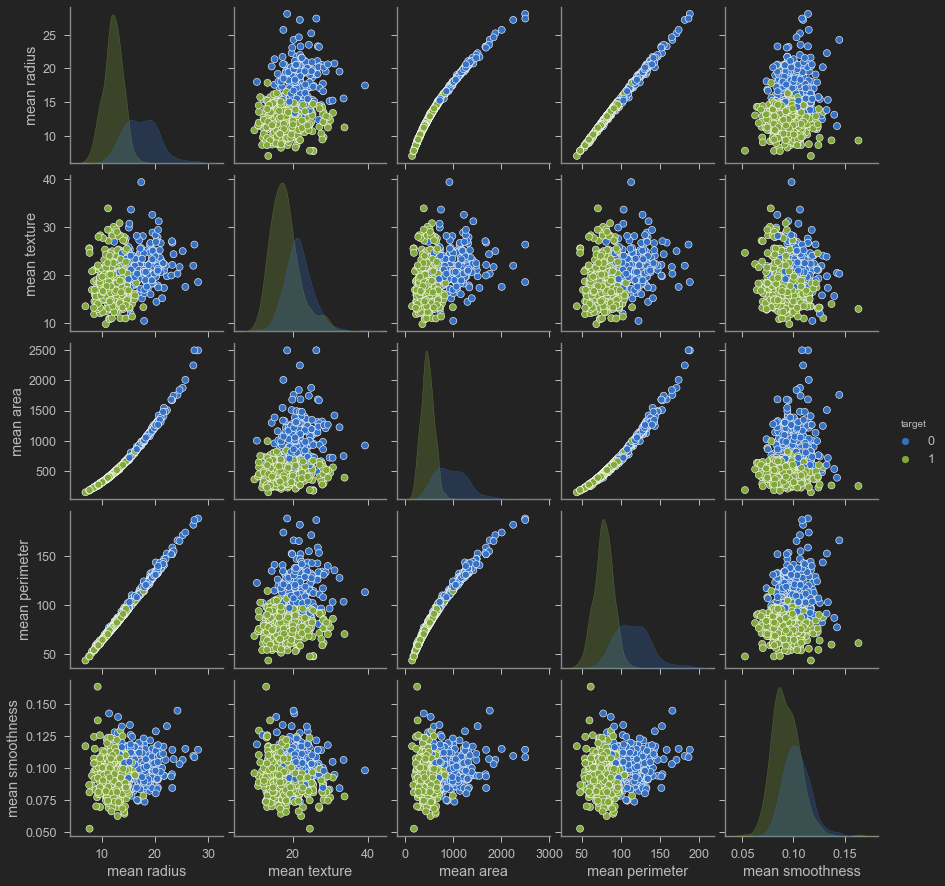

In [7]:
# Plot the pairplot
sns.pairplot(df, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'] )

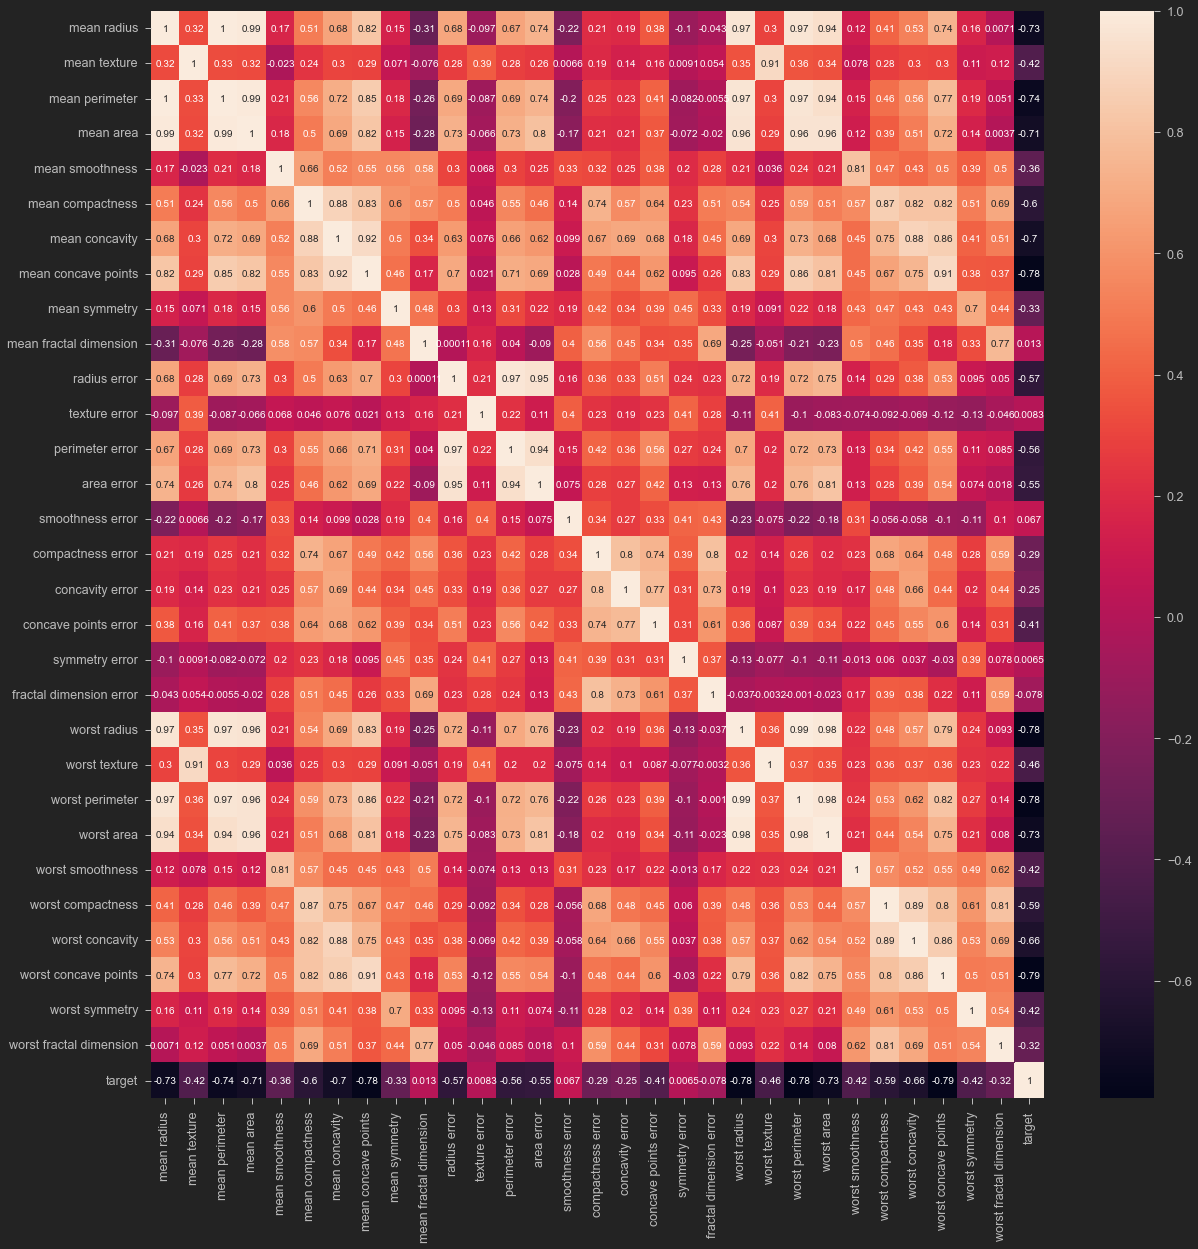

In [8]:
# Correlation plot
plt.figure(figsize = (20,20))
cm = df.corr()
sns.heatmap(cm, annot = True);

In [9]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 0)

In [10]:
# Train multiple ML regression models using AutoGluon
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column

predictor = TabularPredictor(label = "target", problem_type = 'binary', eval_metric = 'accuracy').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20240426_041614\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20240426_041614\"
AutoGluon Version:  0.3.1
Train Data Rows:    455
Train Data Columns: 30
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    885.02 MB
	Train Data (Original)  Memory Usage: 0.11 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Types of features i

Fitting model: XGBoost_BAG_L1 ... Training model for up to 170.57s of the 170.56s of remaining time.
	0.9626	 = Validation score   (accuracy)
	3.01s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetMXNet_BAG_L1 ... Training model for up to 167.32s of the 167.31s of remaining time.
	0.9846	 = Validation score   (accuracy)
	24.53s	 = Training   runtime
	0.29s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 142.36s of the 142.35s of remaining time.
C:\Users\User.DESKTOP-8TITEIC\miniconda3\envs\tf36\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User.DESKTOP-8TITEIC\miniconda3\envs\tf36\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbo

C:\Users\User.DESKTOP-8TITEIC\miniconda3\envs\tf36\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\User.DESKTOP-8TITEIC\miniconda3\envs\tf36\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	0.9604	 = Validation score   (accuracy)
	11.58s	 = Training   runtime
	0.08s	 = Validation runtime
Completed 2/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L2 ... Training model for up to 199.77s of the 66.35s of remaining time.
	0.9846

In [11]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.984615       0.805257  99.038890                0.001006           0.813552            2       True         13
1     NeuralNetMXNet_BAG_L1   0.980220       0.661513  67.067968                0.661513          67.067968            1       True         11
2         LightGBMXT_BAG_L1   0.971429       0.063231   4.198609                0.063231           4.198609            1       True          3
3           CatBoost_BAG_L1   0.971429       0.079507  26.958760                0.079507          26.958760            1       True          7
4           LightGBM_BAG_L1   0.967033       0.054268   6.527920                0.054268           6.527920            1       True          4
5     ExtraTreesEntr_BAG_L1   0.967033       0.297769   1.297448                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L1': 'StackerEnsembleModel_TabularNeuralNet',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.9230769230769231,
  'KNeighborsDist_BAG_L1': 0.9208791208791208,
  'LightGBMXT_BAG_L1': 0.9714285714285714,
  'LightGBM_BAG_L1': 0.967032967032967,
  'RandomForestGini_BAG_L1': 0.9626373626373627,
  'RandomForestEntr_BAG_L1': 

In [12]:
predictor.leaderboard()

                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.984615       0.805257  99.038890                0.001006           0.813552            2       True         13
1     NeuralNetMXNet_BAG_L1   0.980220       0.661513  67.067968                0.661513          67.067968            1       True         11
2         LightGBMXT_BAG_L1   0.971429       0.063231   4.198609                0.063231           4.198609            1       True          3
3           CatBoost_BAG_L1   0.971429       0.079507  26.958760                0.079507          26.958760            1       True          7
4           LightGBM_BAG_L1   0.967033       0.054268   6.527920                0.054268           6.527920            1       True          4
5     ExtraTreesEntr_BAG_L1   0.967033       0.297769   1.297448                0.297769           1.297448            1       True          9

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.984615,0.805257,99.038890,0.001006,0.813552,2,True,13
1,NeuralNetMXNet_BAG_L1,0.980220,0.661513,67.067968,0.661513,67.067968,1,True,11
2,LightGBMXT_BAG_L1,0.971429,0.063231,4.198609,0.063231,4.198609,1,True,3
3,CatBoost_BAG_L1,0.971429,0.079507,26.958760,0.079507,26.958760,1,True,7
4,LightGBM_BAG_L1,0.967033,0.054268,6.527920,0.054268,6.527920,1,True,4
5,ExtraTreesEntr_BAG_L1,0.967033,0.297769,1.297448,0.297769,1.297448,1,True,9
6,RandomForestEntr_BAG_L1,0.964835,0.165457,0.937675,0.165457,0.937675,1,True,6
7,RandomForestGini_BAG_L1,0.962637,0.265555,1.008457,0.265555,1.008457,1,True,5
8,LightGBMLarge_BAG_L1,0.960440,0.075296,11.577938,0.075296,11.577938,1,True,12
9,XGBoost_BAG_L1,0.960440,0.100757,6.382348,0.100757,6.382348,1,True,10


                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.984615       0.805257  99.038890                0.001006           0.813552            2       True         13
1     NeuralNetMXNet_BAG_L1   0.980220       0.661513  67.067968                0.661513          67.067968            1       True         11
2         LightGBMXT_BAG_L1   0.971429       0.063231   4.198609                0.063231           4.198609            1       True          3
3           CatBoost_BAG_L1   0.971429       0.079507  26.958760                0.079507          26.958760            1       True          7
4           LightGBM_BAG_L1   0.967033       0.054268   6.527920                0.054268           6.527920            1       True          4
5     ExtraTreesEntr_BAG_L1   0.967033       0.297769   1.297448                0.297769           1.297448            1       True          9

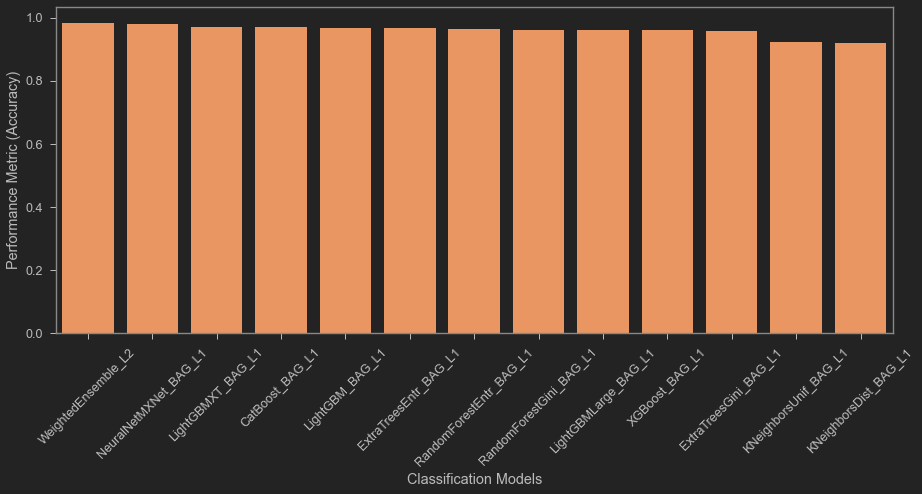

In [13]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "y")
ax.set(ylabel = "Performance Metric (Accuracy)", xlabel = "Classification Models")
plt.xticks(rotation = 45);


In [14]:
# assess model performance
y_pred = predictor.predict(X_test)
y_pred

512    0
457    1
439    1
298    1
37     1
      ..
213    0
519    1
432    0
516    0
500    1
Name: target, Length: 114, dtype: int64

In [15]:
y_test = X_test['target']
y_test # groundtruth

512    0
457    1
439    1
298    1
37     1
      ..
213    0
519    1
432    0
516    0
500    1
Name: target, Length: 114, dtype: int64

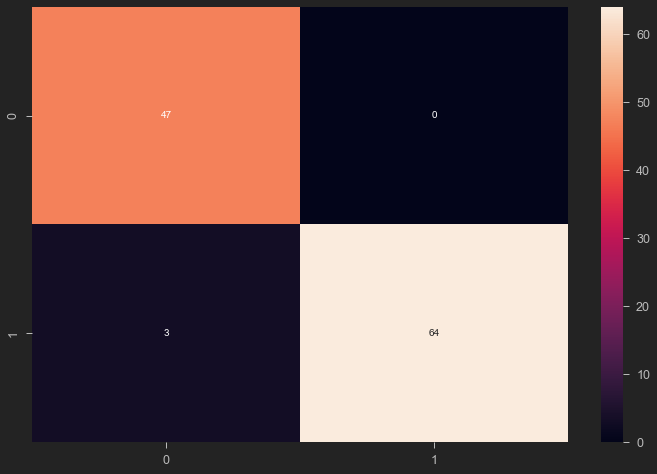

In [16]:
# Training set Performance
from sklearn.metrics import confusion_matrix

# Testing Set Performance
plt.figure(figsize = (12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, fmt = 'd', annot = True);